# Time Series

Pandas는 표준 시계열 도구와 데이터 알고리즘을 제공한다. 이를 통해 대량의 시계열 데이터를 쉽게 나누고, 집계하고, 불규칙적이며 고정된 빈도를 가즌 시계열을 리샘플링 할 수 있다. 대부분의 도구들은 금융이나 경제 관련 어플리케이션 그리고 서버 로그 데이터를 분석하는 데도 사용할 수 있다.

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [2]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2022, 3, 13)

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

In [4]:
# timedelta는 두 datetime 객체 간의 시간적인 차이를 표현
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [5]:
stamp = datetime(2011, 1, 3)
# str 포맷 규칙을 넘겨서 문자열로 나타낼 수 있다.
str(stamp)

'2011-01-03 00:00:00'

In [6]:
# strftime 포맷 규칙을 넘겨서 문자열로 나타낼 수 있다.
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [7]:
value = '2011-01-03'
# strptime 문자열을 날짜로 변경
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [8]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [9]:
# parse는 흔히 쓰이는 형식인 경우 날짜로 변경해준다.
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [10]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [11]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [12]:
# Pandas의 경우 DataFrame의 컬럼이나 축 색인으로 날짜가 담긴 배열을 사용한다. 표준 날짜 형식의 경우 to_datetime으로 빠르게 처리 가능하다. 
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [13]:
# 누락값으로 간주되어야 할 값도 처리
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

# Time Series Basics

In [14]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [15]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [16]:
# pandas는 numpy의 datetime64 자료형을 사용해서 나노초의 정밀도를 가지는 타임스탬프를 저장한다.
ts.index.dtype

dtype('<M8[ns]')

## Indexing, Selection, Subsetting

In [17]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [18]:
ts['1/10/2011']

1.9657805725027142

In [19]:
ts['20110110']

1.9657805725027142

In [20]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [21]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

## Time Series with Duplicate Indices

In [22]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [23]:
# 특정 타임스탬프에 데이터가 몰려있다, 색인이 유일하지 않다.
dup_ts.index.is_unique

False

In [24]:
# level=0 (단일 단계 인덱싱)을 넘기는 것이다.
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [25]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# Date Ranges, Frequencies, and Shifting

In [26]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [27]:
# 문자열 D는 day 빈도, 빈도간 변환이나 리샘플링은 11.6절에서 다룬다. 여기서는 기본 빈도와 다중 빈도 사용법을 배운다
resampler = ts.resample('D')

## Generating Date Ranges

In [28]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [29]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [30]:
# 각 월의 마지막 영업일을 포함하도록 하고 싶다면 빈도값으로 'BM'
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

## Frequencies and Date Offsets

In [31]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [32]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [33]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

## Shifting (Leading and Lagging) Data

시프트는 데이터를 시간 축에서 앞이나 뒤로 이동하는 것을 의미한다. Series나 DF는 색은 변경하지 않는 느슨한 shift 메서드를 가지고 있다.

In [34]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.488675
2000-02-29   -0.178098
2000-03-31    2.122315
2000-04-30    0.061192
Freq: M, dtype: float64

In [35]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.488675
2000-04-30   -0.178098
Freq: M, dtype: float64

In [36]:
ts.shift(-2)

2000-01-31    2.122315
2000-02-29    0.061192
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [37]:
ts.shift(2, freq='M')

2000-03-31    0.488675
2000-04-30   -0.178098
2000-05-31    2.122315
2000-06-30    0.061192
Freq: M, dtype: float64

## Shifting dates with offsets

In [38]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [39]:
# 앵커드 오프셋은 rollforward와 rollback 메서드를 사용해 명시적으로 각각 날짜를 앞으로 밀거나 뒤로 당길 수 있다.
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [40]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [41]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.884111
2000-01-19   -0.608506
2000-01-23   -0.072052
2000-01-27    0.544066
2000-01-31    0.323886
2000-02-04   -1.683325
2000-02-08    0.526860
2000-02-12    1.858791
2000-02-16   -0.548419
2000-02-20   -0.279397
2000-02-24   -0.021299
2000-02-28   -0.287990
2000-03-03    0.089175
2000-03-07    0.522858
2000-03-11    0.572796
2000-03-15   -1.760372
2000-03-19    1.128179
2000-03-23    1.568606
2000-03-27   -0.342277
2000-03-31   -0.009813
Freq: 4D, dtype: float64

In [42]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.214301
2000-02-29   -0.062111
2000-03-31    0.221144
dtype: float64

In [44]:
# resample은 11.6절에서 다룬다.
ts.resample('M').mean()

2000-01-31    0.214301
2000-02-29   -0.062111
2000-03-31    0.221144
Freq: M, dtype: float64

# Time Zone Handling

In [45]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

## Time Zone Localization and Conversion

In [46]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.053072
2012-03-10 09:30:00   -0.041943
2012-03-11 09:30:00   -1.694312
2012-03-12 09:30:00   -0.362381
2012-03-13 09:30:00    1.127453
2012-03-14 09:30:00    2.183830
Freq: D, dtype: float64

In [51]:
# 시간대를 지정해서 날짜 범위를 생성할 수 있다.
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [54]:
# 지역화 시간으로의 변환은 tz_localize 메서드로 처리할 수 있다.
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.053072
2012-03-10 09:30:00+00:00   -0.041943
2012-03-11 09:30:00+00:00   -1.694312
2012-03-12 09:30:00+00:00   -0.362381
2012-03-13 09:30:00+00:00    1.127453
2012-03-14 09:30:00+00:00    2.183830
Freq: D, dtype: float64

In [55]:
# 다른 시간대로 변환
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.053072
2012-03-10 04:30:00-05:00   -0.041943
2012-03-11 05:30:00-04:00   -1.694312
2012-03-12 05:30:00-04:00   -0.362381
2012-03-13 05:30:00-04:00    1.127453
2012-03-14 05:30:00-04:00    2.183830
Freq: D, dtype: float64

## Operations with Time Zone−Aware Timestamp Objects

In [58]:
# Timestamp 객체도 시간대를 고려한 형태로 변환이 가능하다.

stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [59]:
# Timestamp 객체는 내부적으로 UTC 타임스탬프 값을 유닉스 에포크부터 현재까지 나노초로 저장

stamp_utc.value

1299902400000000000

In [60]:
# UTC 값은 시간대 변환과정에서 변하지 않고 유지된다.

stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [61]:
from pandas.tseries.offsets import Hour

# DST 시행 30분 전
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [62]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [66]:
# DST 종료 90분 전
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [70]:
stamp + 2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

# Periods and Period Arithmetic

In [71]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [72]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [73]:
# PeriodIndex 객체 생성
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

## Period Frequency Conversion

In [75]:
# 여기서 Period 객체는 2007.01.01 부터 2007.12.31 까지의 기간을 표현
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [76]:
# asfreq 다른 빈도로 변환
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [77]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [78]:
# Period('2007', freq='A-JUN')는 전체 기간에 대한 커서
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [84]:
# 2007.08은 A-JUN 빈도에서 2008에 속한다.

p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

## Quarterly Period Frequencies

In [87]:
# 2012.11 ~ 2013.01
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [88]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

to_period(), to_timestamp 메서드를 통해 기간을 타임스탬프로 타임스탬프를 기간으로 변경 가능하다.

# Resampling and Frequency Conversion

resample은 시계열의 빈도를 변환하는 과정을 일컫는다. 상위 빈도의 데이터를 하위 빈도로 집계하는 것을 다운샘플링이라고 하며 반대 과정을 업샘플링이라고 한다. W-WED -> W-FRI와 같이 업샘플링도 다운샘플링도 아닌 변환도 있다. 

In [94]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.266839
2000-01-02   -1.848272
2000-01-03   -1.080249
2000-01-04    0.002939
2000-01-05   -0.630089
                ...   
2000-04-05   -0.889604
2000-04-06   -0.173346
2000-04-07    0.643302
2000-04-08   -1.254008
2000-04-09    0.117248
Freq: D, Length: 100, dtype: float64

In [95]:
ts.resample('M').mean()

2000-01-31   -0.489820
2000-02-29   -0.099663
2000-03-31   -0.304679
2000-04-30   -0.168926
Freq: M, dtype: float64

In [98]:
ts.resample('M', kind='period').mean()

2000-01   -0.489820
2000-02   -0.099663
2000-03   -0.304679
2000-04   -0.168926
Freq: M, dtype: float64

## Downsampling

- 각 간격의 양끝 중에서 어느 쪽을 닫아둘 것인가?
- 집계하려는 구간의 라벨을 간격의 시작으로 할지 끝으로 할지 여부

In [99]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [106]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [103]:
# 시작값을 그룹의 오른쪽에 포함시킨다 closed='right'
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [104]:
# label='right' 각 그룸의 오른쪽 값을 라벨로 사용
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [107]:
# 색인을 특정 크기만큼 이동시키고 싶은 경우
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

C:\Users\isoh1\AppData\Local\Temp/ipykernel_7756/95277004.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [108]:
# 금융 시계열 데이터에서 주로 이용
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## Upsampling and Interpolation

In [109]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.866544,1.079464,-0.397475,1.487506
2000-01-12,0.558011,0.614350,0.427964,-0.271959


In [110]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.866544,1.079464,-0.397475,1.487506
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.558011,0.614350,0.427964,-0.271959


In [111]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.866544,1.079464,-0.397475,1.487506
2000-01-06,0.866544,1.079464,-0.397475,1.487506
2000-01-07,0.866544,1.079464,-0.397475,1.487506
2000-01-08,0.866544,1.079464,-0.397475,1.487506
2000-01-09,0.866544,1.079464,-0.397475,1.487506
2000-01-10,0.866544,1.079464,-0.397475,1.487506
2000-01-11,0.866544,1.079464,-0.397475,1.487506
2000-01-12,0.558011,0.614350,0.427964,-0.271959


In [112]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.866544,1.079464,-0.397475,1.487506
2000-01-06,0.866544,1.079464,-0.397475,1.487506
2000-01-07,0.866544,1.079464,-0.397475,1.487506
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.558011,0.614350,0.427964,-0.271959


In [113]:
# 목요일마다 채워 넣음
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.866544,1.079464,-0.397475,1.487506
2000-01-13,0.558011,0.614350,0.427964,-0.271959


## Resampling with Periods

In [115]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.474896,0.618284,0.442271,-1.326962
2000-02,0.927045,-0.115572,0.943479,-0.349366
2000-03,0.530412,-0.508724,0.230643,-0.065569
2000-04,-0.248717,-0.587136,-1.022324,1.060661
2000-05,0.954768,-0.511824,-1.387680,0.767902


In [116]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.199435,-0.035498,-0.297491,-0.223438
2001,0.127841,-0.370618,0.481366,-0.005528


In [117]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.199435,-0.035498,-0.297491,-0.223438
2000Q2,0.199435,-0.035498,-0.297491,-0.223438
2000Q3,0.199435,-0.035498,-0.297491,-0.223438
2000Q4,0.199435,-0.035498,-0.297491,-0.223438
2001Q1,0.127841,-0.370618,0.481366,-0.005528
2001Q2,0.127841,-0.370618,0.481366,-0.005528
2001Q3,0.127841,-0.370618,0.481366,-0.005528
2001Q4,0.127841,-0.370618,0.481366,-0.005528


In [118]:
# convention : 새로운 빈도에서 구간의 끝을 어느 쪽에 둘지 결정
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.199435,-0.035498,-0.297491,-0.223438
2001Q1,0.199435,-0.035498,-0.297491,-0.223438
2001Q2,0.199435,-0.035498,-0.297491,-0.223438
2001Q3,0.199435,-0.035498,-0.297491,-0.223438
2001Q4,0.127841,-0.370618,0.481366,-0.005528


# Moving Window Functions

In [127]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

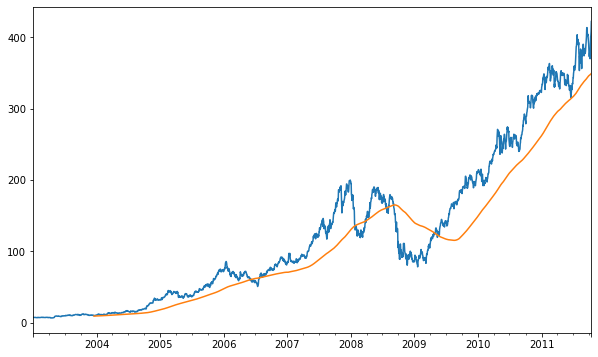

In [130]:
close_px.AAPL.plot()
# 250일선
close_px.AAPL.rolling(250).mean().plot()

In [141]:
# 시계열의 시작지점은 필연적으로 NaN

appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [145]:
# NaN 발생문제 때문에 rolling 함수의 동작방식은 변경될 수 있다. 
# expanding window mean은 시계열의 시작지점에서부터 창의 크기가 시계열의 전체 
# 크기가 될 때까지 점점 창의 크기를 늘린다.

appl_std250.expanding().mean()[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.076128
2003-01-17    0.088208
Freq: B, Name: AAPL, dtype: float64

In [142]:
# 빈도가 불규칙한 경우 rolling은 유용, 20일 크기의 이동평균선
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


## Exponentially Weighted Functions

지수 가중 통계는 최근 값에 좀 더 많은 가중치를 두는 방법. pandas는 rolling, expanding과 함께 사용할 수 있는 ewm 연산자를 제공한다. 아래는 애플 주가 60일 이동평균을 span=60으로 구한 지수 가중 이동평균과 비교한  것이다. 

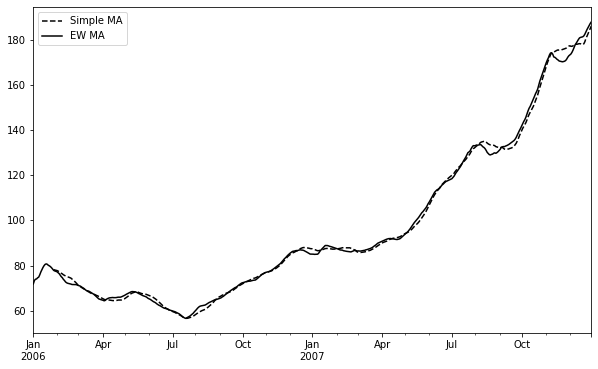

In [151]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

## Binary Moving Window Functions

In [152]:
spx_px = close_px_all['SPX']
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [153]:
spx_rets = spx_px.pct_change()
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [154]:
returns = close_px.pct_change()
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


<AxesSubplot:>

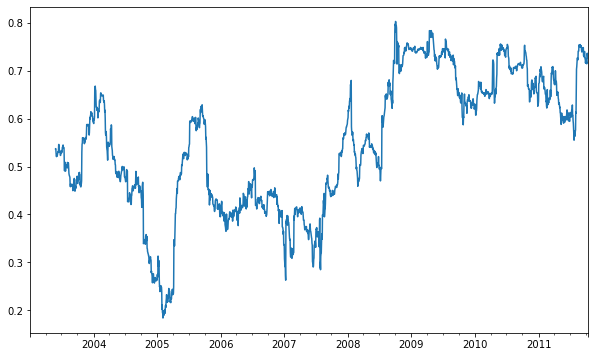

In [148]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

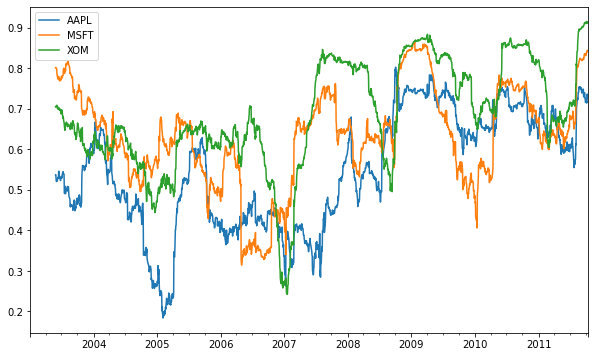

In [150]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

# User-Defined Moving Window Functions

rolling이나 다른 관련 메서드에 apply를 호출해서 이동창에 대한 사용자 정의 연산을 수행할 수 있다. 

<AxesSubplot:>

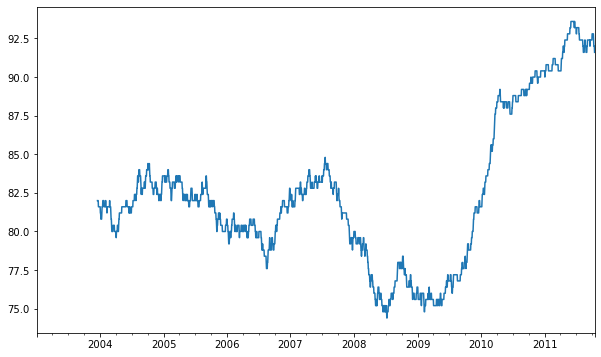

In [155]:
# 2%의 연간 APPL 수익률에 대한 백분위 점수
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [156]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS